In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Data And Preprocessing

This assignment uses the breast cancer dataset from SciKit learn. We first import the data and split into 80% training and 20% testing sets. We then fit a StandardScaler() to our training data to standardize the features. Then, both sets of data are standardized using the StandardScaler.

In [2]:
bc_data = sklearn.datasets.load_breast_cancer(as_frame=True)

# Split for training and test
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(bc_data.data, bc_data.target, test_size=0.2, random_state=42)

# Fit a scalar to training data
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)

# Scale Data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
# Helper function to compute F1 score
def computeF1(precision, recall):
    return (2 * precision * recall) / (precision + recall)

# K-Nearest Neighbors

We initially train and test K-Nearest Neighbors models with different n_neighbors. 

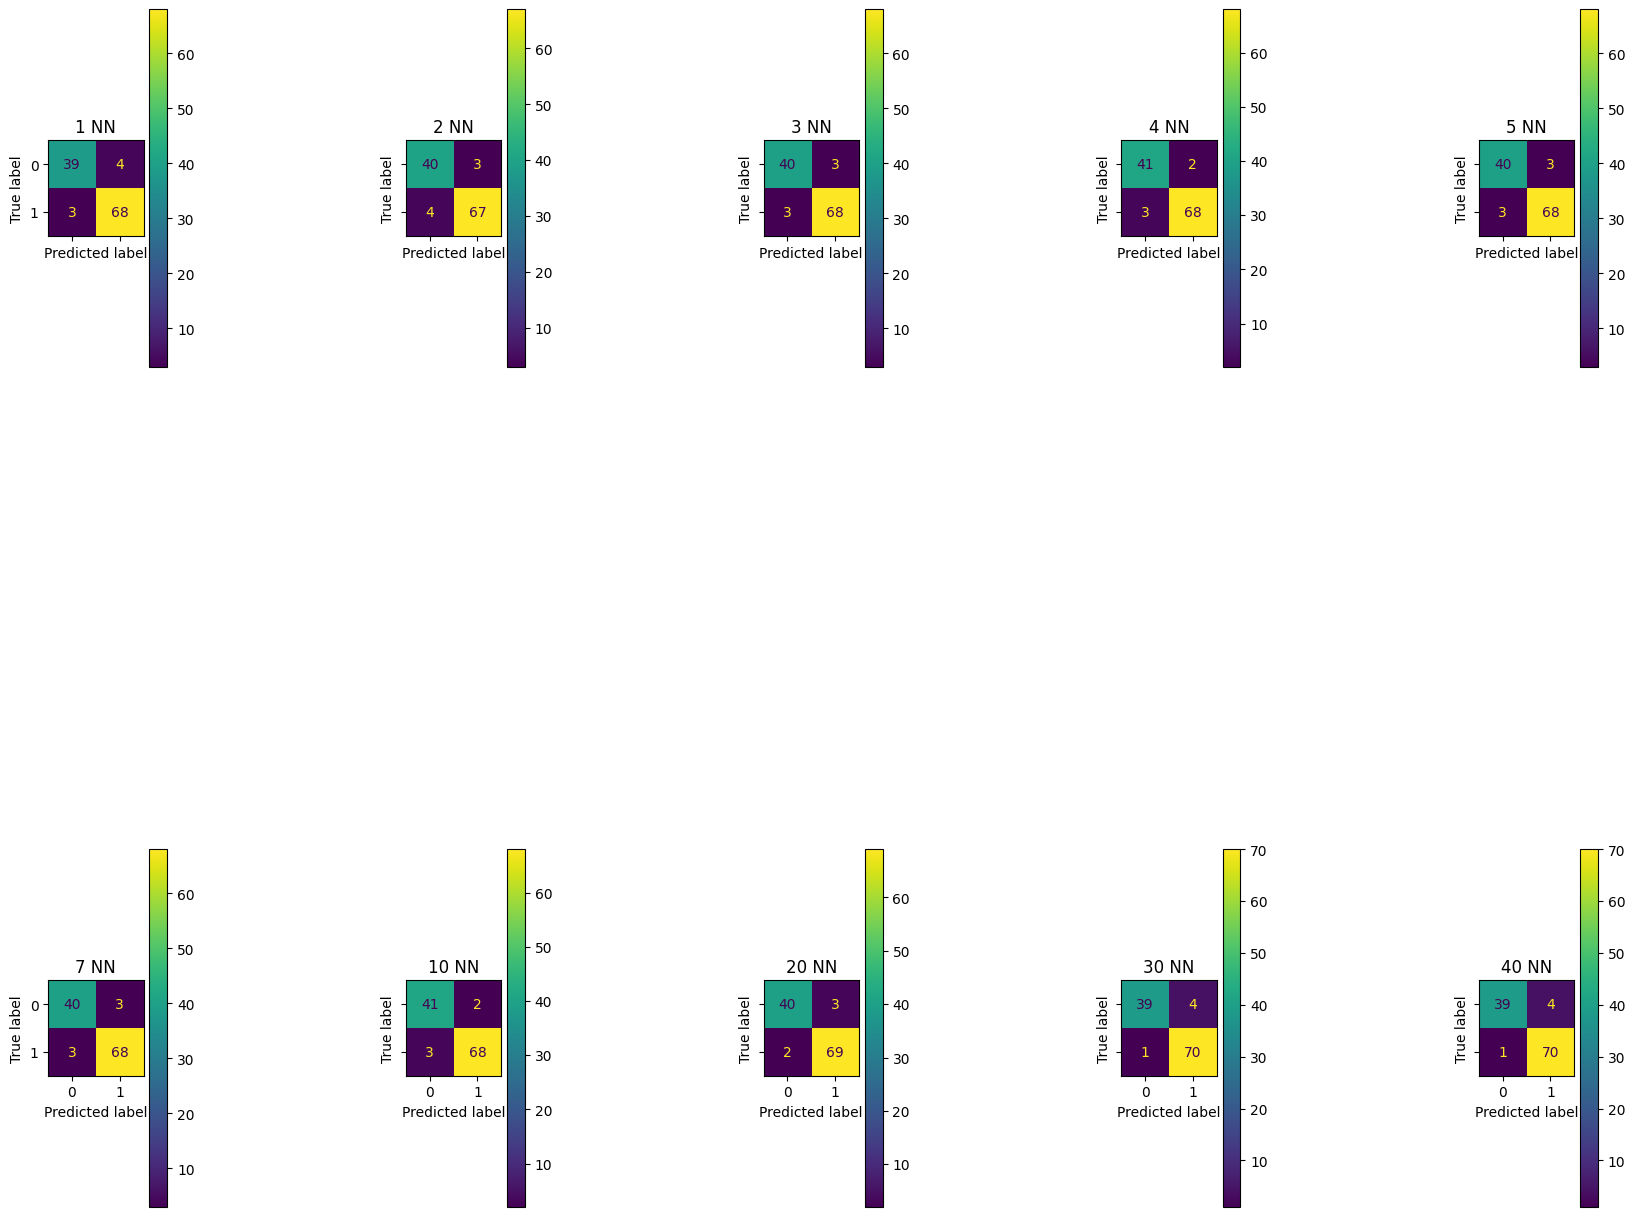

,k-nn,True Positive,False Positive,False Negative,True Negative,Training Accuracy,Test Accuracy,Accuracy,Precision,Recall,F1 Score
0,30.0,70.0,4.0,1.0,39.0,0.953846,0.956140,0.956140,0.945946,0.985915,0.965517
0,4.0,68.0,2.0,3.0,41.0,0.989011,0.956140,0.956140,0.971429,0.957746,0.964539
0,40.0,70.0,4.0,1.0,39.0,0.951648,0.956140,0.956140,0.945946,0.985915,0.965517
0,10.0,68.0,2.0,3.0,41.0,0.973626,0.956140,0.956140,0.971429,0.957746,0.964539
0,20.0,69.0,3.0,2.0,40.0,0.964835,0.956140,0.956140,0.958333,0.971831,0.965035
0,7.0,68.0,3.0,3.0,40.0,0.969231,0.947368,0.947368,0.957746,0.957746,0.957746
0,3.0,68.0,3.0,3.0,40.0,0.984615,0.947368,0.947368,0.957746,0.957746,0.957746
0,5.0,68.0,3.0,3.0,40.0,0.980220,0.947368,0.947368,0.957746,0.957746,0.957746
0,2.0,67.0,3.0,4.0,40.0,0.986813,0.938596,0.938596,0.957143,0.943662,0.950355
0,1.0,68.0,4.0,3.0,39.0,1.000000,0.938596,0.938596,0.944444,0.957746,0.951049


In [4]:
# Create and fit a KNN Classifier
KNN_dataframe = pd.DataFrame()
n_neighbors = [1, 2, 3, 4, 5, 7, 10, 20, 30, 40]

# Dictionary of KNN classifiers
knn_classifiers = {}

for n in n_neighbors: 
    knn_classifiers.update({n: sklearn.neighbors.KNeighborsClassifier(n_neighbors=n)})

# Dictionary of confusion matrices for each classifier
confusion_matrices = dict.fromkeys(knn_classifiers.keys())

for key, classifier in knn_classifiers.items():
    classifier.fit(X_train_scaled, y_train)
    predictions = classifier.predict(X_test_scaled)
    confusion_matrices[key] = sklearn.metrics.confusion_matrix(y_test, predictions)
    tn, fp, fn, tp = confusion_matrices[key].ravel()
    model_data = {"k-nn": key, "True Positive": tp, "False Positive": fp, "False Negative": fn, "True Negative": tn,
                 "Training Accuracy" : classifier.score(X_train_scaled, y_train), 
                  "Test Accuracy" : classifier.score(X_test_scaled, y_test), 
                 "Accuracy" : (tp + tn) / (tp + tn + fn + fp), "Precision" : (tp) / (tp + fp), "Recall" : (tp) / (tp + fn), 
                  "F1 Score" : computeF1((tp) / (tp + fp), (tp) / (tp + fn))}
    series = pd.Series(model_data, index=["k-nn", "True Positive", "False Positive", "False Negative", "True Negative", "Training Accuracy",
                                         "Test Accuracy", "Accuracy", "Precision", "Recall", "F1 Score"])
    KNN_dataframe = pd.concat([KNN_dataframe, series.to_frame().T])

fig, axn = plt.subplots(2,5, sharex=True, sharey=True,figsize=(20,20))

for i, ax in enumerate(axn.flat):
    k = list(confusion_matrices)[i]
    display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrices[k])
    display.plot(ax=ax)
    ax.set_title(str(k) + " NN")
plt.subplots_adjust(wspace=2, hspace=0.2) 
plt.show()

KNN_dataframe.sort_values(by=['Accuracy'], ascending = False)

## Decision Tree

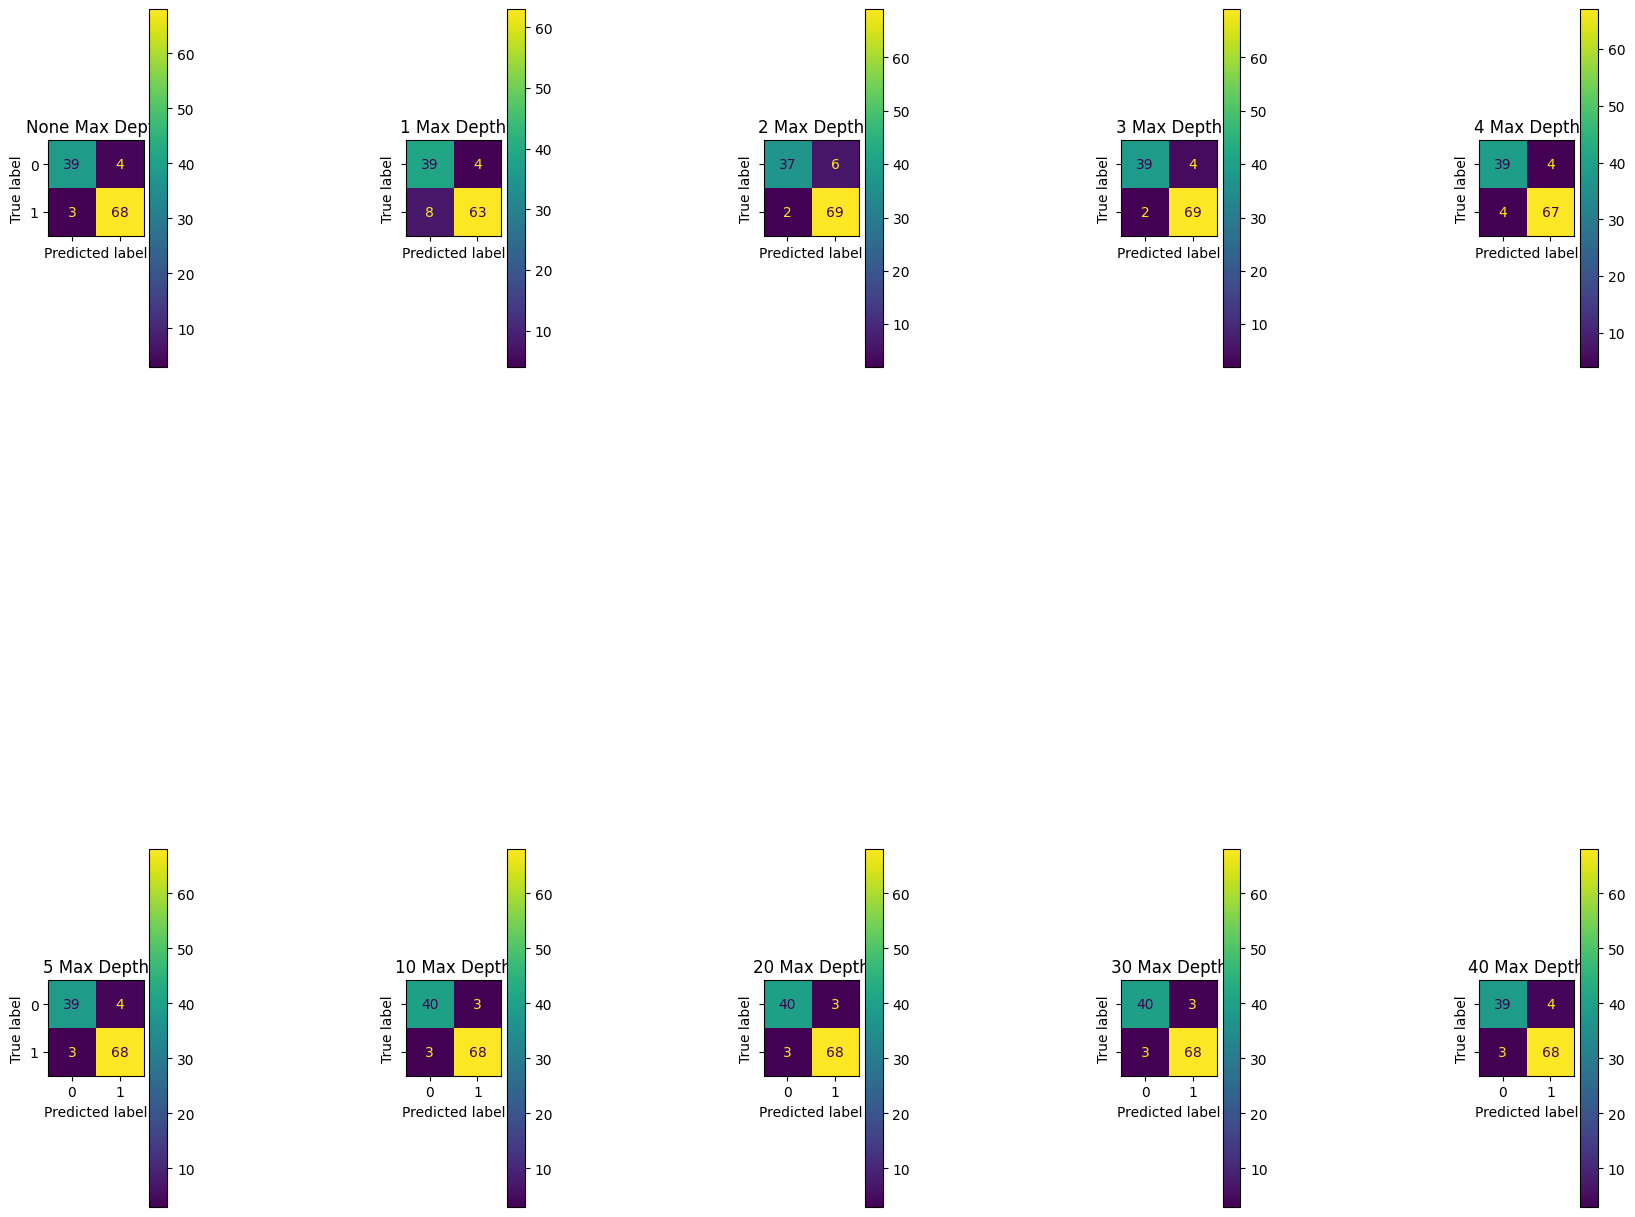

,Max Depth,True Positive,False Positive,False Negative,True Negative,Training Accuracy,Test Accuracy,Accuracy,Precision,Recall,F1 Score
0,30.0,68.0,3.0,3.0,40.0,1.000000,0.947368,0.947368,0.957746,0.957746,0.957746
0,3.0,69.0,4.0,2.0,39.0,0.978022,0.947368,0.947368,0.945205,0.971831,0.958333
0,20.0,68.0,3.0,3.0,40.0,1.000000,0.947368,0.947368,0.957746,0.957746,0.957746
0,10.0,68.0,3.0,3.0,40.0,1.000000,0.947368,0.947368,0.957746,0.957746,0.957746
0,5.0,68.0,4.0,3.0,39.0,0.995604,0.938596,0.938596,0.944444,0.957746,0.951049
0,NaN,68.0,4.0,3.0,39.0,1.000000,0.938596,0.938596,0.944444,0.957746,0.951049
0,40.0,68.0,4.0,3.0,39.0,1.000000,0.938596,0.938596,0.944444,0.957746,0.951049
0,4.0,67.0,4.0,4.0,39.0,0.995604,0.929825,0.929825,0.943662,0.943662,0.943662
0,2.0,69.0,6.0,2.0,37.0,0.929670,0.929825,0.929825,0.920000,0.971831,0.945205
0,1.0,63.0,4.0,8.0,39.0,0.920879,0.894737,0.894737,0.940299,0.887324,0.913043


In [5]:
# Create and fit a Decision forest Classifier
DT_dataframe = pd.DataFrame()
max_depth = [None, 1, 2, 3, 4, 5, 10, 20, 30, 40]


# Dictionary of random forest classifiers
DT_classifiers = {}

for depth in max_depth: 
    DT_classifiers.update({depth: sklearn.tree.DecisionTreeClassifier(max_depth = depth)})

# Dictionary of confusion matrices for each classifier
confusion_matrices = dict.fromkeys(DT_classifiers.keys())

for key, classifier in DT_classifiers.items():
    classifier.fit(X_train_scaled, y_train)
    predictions = classifier.predict(X_test_scaled)
    confusion_matrices[key] = sklearn.metrics.confusion_matrix(y_test, predictions)
    tn, fp, fn, tp = confusion_matrices[key].ravel()
    model_data = {"Max Depth": key, "True Positive": tp, "False Positive": fp, "False Negative": fn, "True Negative": tn,
                 "Training Accuracy" : classifier.score(X_train_scaled, y_train), 
                  "Test Accuracy" : classifier.score(X_test_scaled, y_test), 
                 "Accuracy" : (tp + tn) / (tp + tn + fn + fp), "Precision" : (tp) / (tp + fp), "Recall" : (tp) / (tp + fn), 
                  "F1 Score" : computeF1((tp) / (tp + fp), (tp) / (tp + fn))}
    # Storing metrics in a nice format
    series = pd.Series(model_data, index=["Max Depth", "True Positive", "False Positive", "False Negative", "True Negative", "Training Accuracy",
                                         "Test Accuracy", "Accuracy", "Precision", "Recall", "F1 Score"])
    DT_dataframe = pd.concat([DT_dataframe, series.to_frame().T])

# Plot confusion matrices and show the dataframe. 
fig, axn = plt.subplots(2,5, sharex=True, sharey=True,figsize=(20,20))

for i, ax in enumerate(axn.flat):
    k = list(confusion_matrices)[i]
    display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrices[k])
    display.plot(ax=ax)
    ax.set_title(str(k) + " Max Depth")
plt.subplots_adjust(wspace=2, hspace=0.2) 
plt.show()

DT_dataframe.sort_values(by=['Accuracy'], ascending = False)

## Random Forest

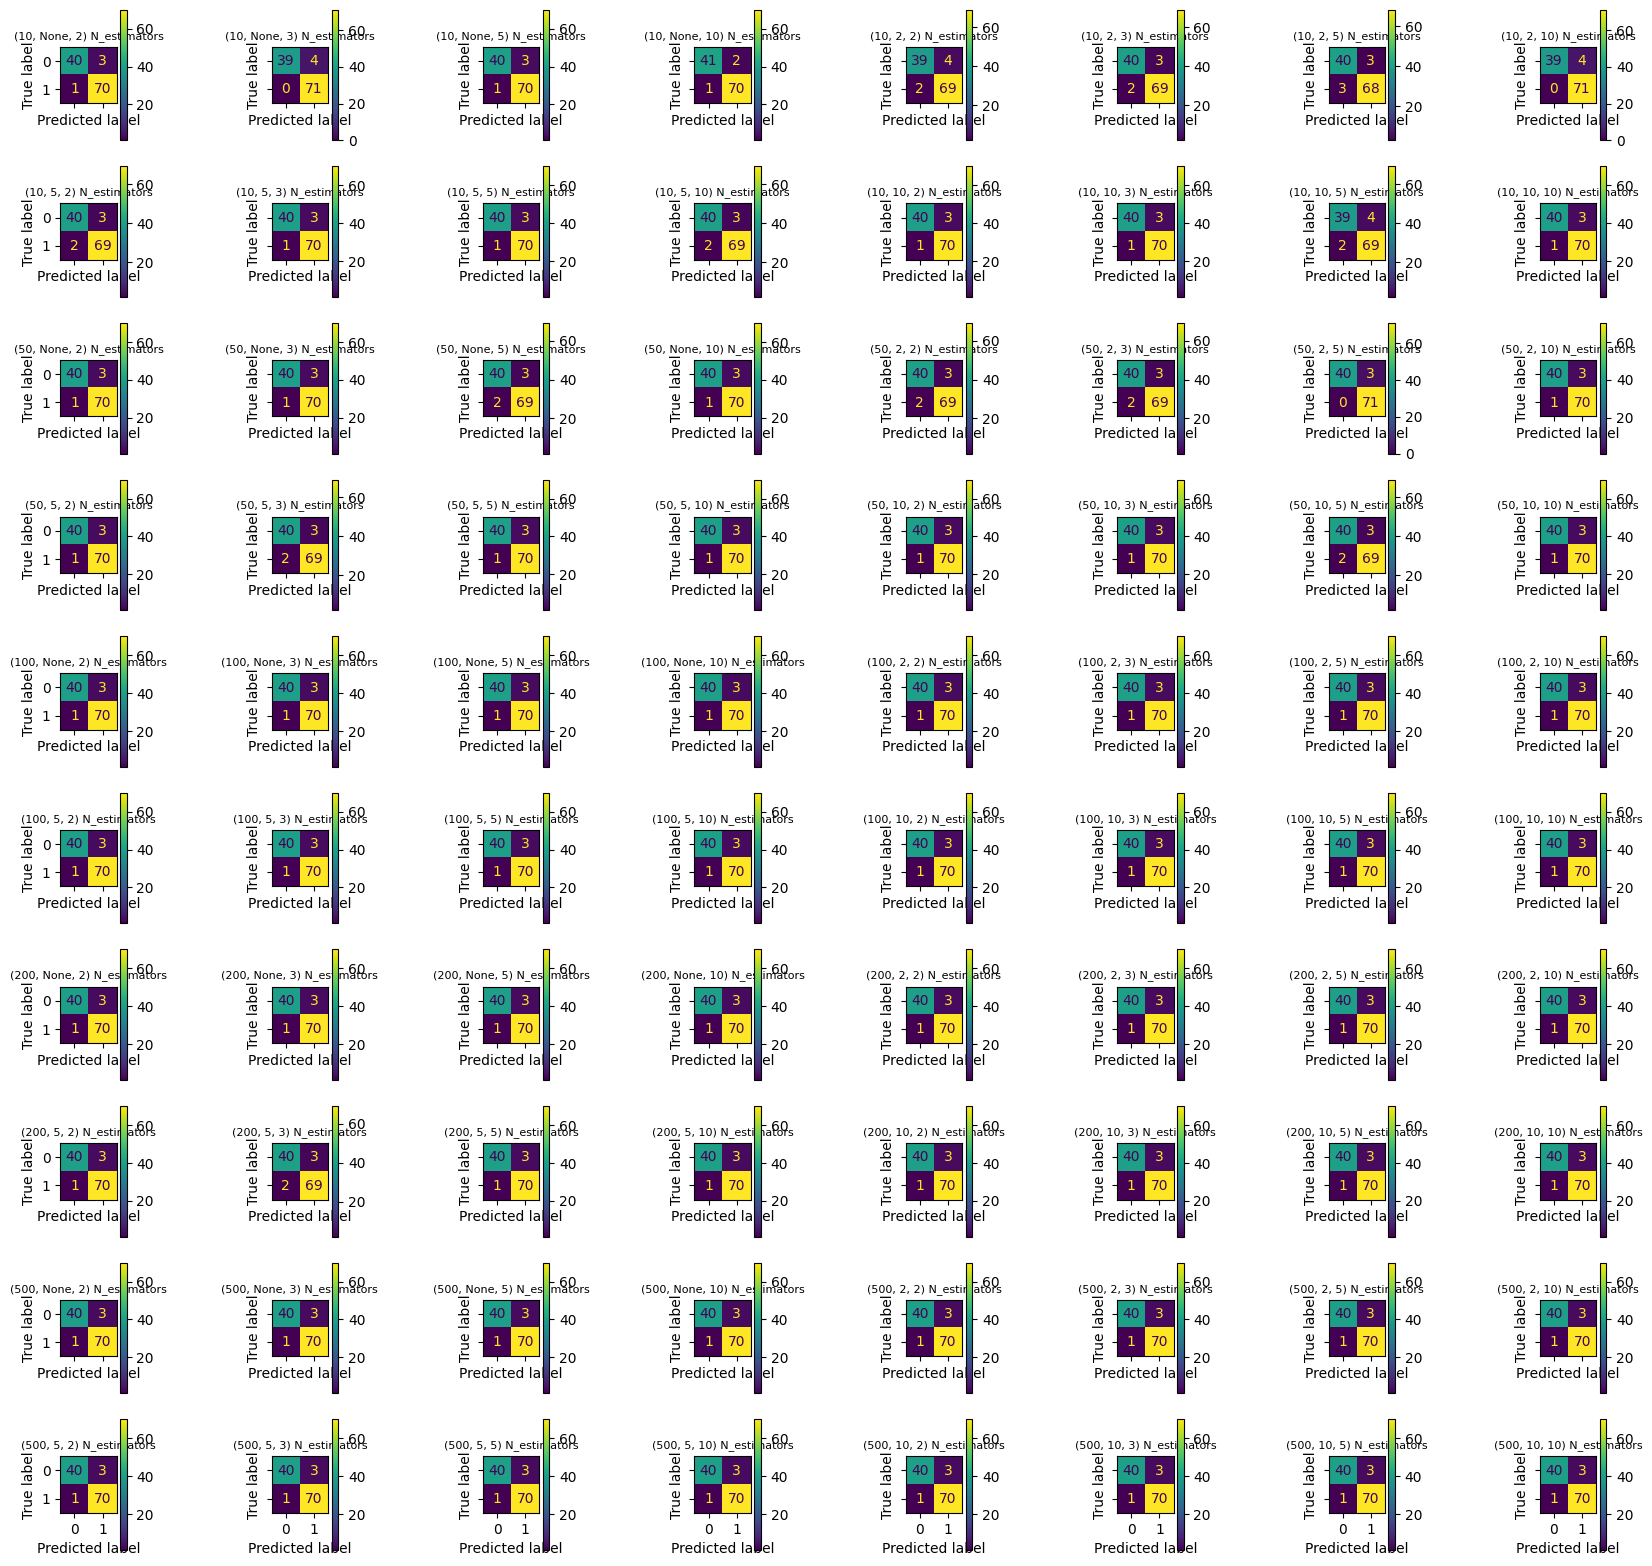

,"N_estimators, max_depth, min_samples_split",True Positive,False Positive,False Negative,True Negative,Training Accuracy,Test Accuracy,Accuracy,Precision,Recall,F1 Score
0,"(50, 2, 5)",71,3,0,40,0.962637,0.973684,0.973684,0.959459,1.0,0.97931
0,"(10, None, 10)",70,2,1,41,0.98022,0.973684,0.973684,0.972222,0.985915,0.979021
0,"(200, None, 10)",70,3,1,40,0.993407,0.964912,0.964912,0.958904,0.985915,0.972222
0,"(200, 5, 10)",70,3,1,40,0.989011,0.964912,0.964912,0.958904,0.985915,0.972222
0,"(200, 5, 5)",70,3,1,40,0.993407,0.964912,0.964912,0.958904,0.985915,0.972222
...,...,...,...,...,...,...,...,...,...,...,...
0,"(50, 2, 2)",69,3,2,40,0.953846,0.95614,0.95614,0.958333,0.971831,0.965035
0,"(50, 2, 3)",69,3,2,40,0.967033,0.95614,0.95614,0.958333,0.971831,0.965035
0,"(10, 10, 5)",69,4,2,39,0.989011,0.947368,0.947368,0.945205,0.971831,0.958333
0,"(10, 2, 5)",68,3,3,40,0.951648,0.947368,0.947368,0.957746,0.957746,0.957746


In [6]:
# Create and fit a Random forest Classifier
RF_dataframe = pd.DataFrame()
RF_n_estimators = [10, 50, 100, 200, 500]
RF_max_depth = [None, 2, 5, 10]
RF_min_samples_split = [2, 3, 5, 10]


# Dictionary of random forest classifiers
RF_classifiers = {}

for estimators in RF_n_estimators: 
    for depth in RF_max_depth:
        for min_samps in RF_min_samples_split:
            RF_classifiers.update({(estimators, depth, min_samps): sklearn.ensemble.RandomForestClassifier(n_estimators = estimators, max_depth = depth, 
                                                                                      min_samples_split=min_samps)})
# Dictionary of confusion matrices for each classifier
confusion_matrices = dict.fromkeys(RF_classifiers.keys())

for key, classifier in RF_classifiers.items():
    classifier.fit(X_train_scaled, y_train)
    predictions = classifier.predict(X_test_scaled)
    confusion_matrices[key] = sklearn.metrics.confusion_matrix(y_test, predictions)
    tn, fp, fn, tp = confusion_matrices[key].ravel()
    model_data = {"N_estimators, max_depth, min_samples_split": key, "True Positive": tp, "False Positive": fp, "False Negative": fn, "True Negative": tn,
                 "Training Accuracy" : classifier.score(X_train_scaled, y_train), 
                  "Test Accuracy" : classifier.score(X_test_scaled, y_test), 
                 "Accuracy" : (tp + tn) / (tp + tn + fn + fp), "Precision" : (tp) / (tp + fp), "Recall" : (tp) / (tp + fn), 
                  "F1 Score" : computeF1((tp) / (tp + fp), (tp) / (tp + fn))}
    # Storing metrics in a nice format
    series = pd.Series(model_data, index=["N_estimators, max_depth, min_samples_split", "True Positive", "False Positive", "False Negative", "True Negative", "Training Accuracy",
                                         "Test Accuracy", "Accuracy", "Precision", "Recall", "F1 Score"])
    RF_dataframe = pd.concat([RF_dataframe, series.to_frame().T])

# Plot confusion matrices and show the dataframe. 
fig, axn = plt.subplots(10,8, sharex=True, sharey=True,figsize=(20,20))

for i, ax in enumerate(axn.flat):
    k = list(confusion_matrices)[i]
    display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrices[k])
    display.plot(ax=ax)
    ax.set_title(str(k) + " N_estimators", fontsize=8)
plt.subplots_adjust(wspace=2, hspace=0.2) 
plt.show()

RF_dataframe.sort_values(by=['Accuracy'], ascending = False)